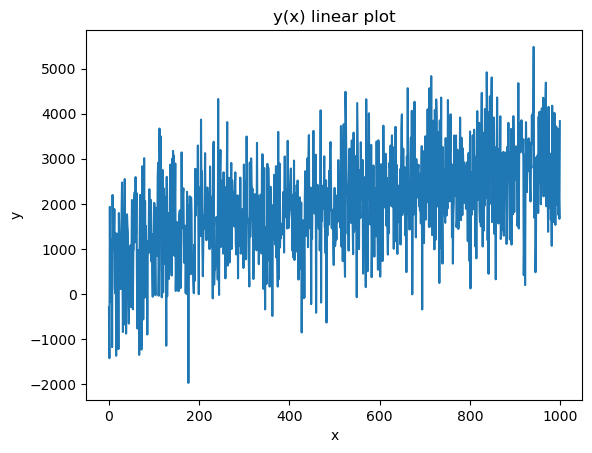

step: 0	E: 5181875.511784259	m: 2.299218183314641	c: 124.87377374205535
step: 1	E: 1464273.6041987336	m: 2.9431737962284616	c: 169.2148812766835
step: 2	E: 1155930.4543428412	m: 3.114172641733684	c: 190.40831011154862
step: 3	E: 1126287.9599491039	m: 3.1501709633419512	c: 204.85929798320956
step: 4	E: 1119548.0972781382	m: 3.147769853316419	c: 217.25909661722056
step: 5	E: 1114806.1021308468	m: 3.1345796841628757	c: 228.95051696318075
step: 6	E: 1110350.1643328692	m: 3.11849004641365	c: 240.319199624336
step: 7	E: 1106036.8152378404	m: 3.101753435577544	c: 251.4771538825186
step: 8	E: 1101850.8389257435	m: 3.0850110379629516	c: 262.4581459984585
step: 9	E: 1097787.6012111786	m: 3.068443490817448	c: 273.2735508517473
step: 10	E: 1093843.4318905736	m: 3.052099823629215	c: 283.92831737234934
step: 11	E: 1090014.8359758195	m: 3.03599148459309	c: 294.4255325943126
step: 12	E: 1086298.4264189443	m: 3.0201192172713838	c: 304.76772664882475
step: 13	E: 1082690.9158717436	m: 3.0044807426604585	

In [1]:
"""
expiremnting with different ways of accounting for the size of the input data
"""
import numpy as np
from matplotlib import pyplot as plt
import math

M_INITIAL_GUESS = 0
C_INITIAL_GUESS = 0
MAX_ITERATIONS = 100
PRESENTAGE_BREAK = 10**-4
LEARNING_RATE = 1

# it returns [m, c]
def minimizeMeanSquaredError(x, y, printlog = True):
    m = M_INITIAL_GUESS
    c = C_INITIAL_GUESS
    lr = LEARNING_RATE
    step = 0
    while step < MAX_ITERATIONS:
        E = _getE(x, y, m, c)
        dEdm = _getdEdm(x, y, m, c)
        dEdc = _getdEdc(x, y, m, c)
        # the m part of the error grows quadratically with length and the c part grows linearly
        # so I included these len(x)**2 and len(x)**1 terms for that
        m -= lr * dEdm / float(len(x)**2)
        c -= lr * dEdc / float(len(x)**0.5)
        if printlog:
            print(f"step: {step}\tE: {E}\tm: {m}\tc: {c}")
        if 0 < step:
            if abs(E - prevE)/abs(E + prevE) < PRESENTAGE_BREAK:
                break
        prevE = E
        step += 1
    return [m, c]

def _getE(x, y, m, c):
    s = 0
    for i in range(len(x)):
        s += (y[i] - m*x[i] - c)**2
    return s / float(len(x))

def _getdEdm(x, y, m, c):
    s = 0
    for i in range(len(x)):
        s += x[i] * (y[i] - m*x[i] - c)
    return - 2 * s / float(len(x))

def _getdEdc(x, y, m, c):
    s = 0
    for i in range(len(x)):
        s += y[i] - m*x[i] - c
    return - 2 * s / float(len(x))


def plot(x, y):
    plt.title("y(x) linear plot") 
    plt.xlabel("x") 
    plt.ylabel("y") 
    plt.plot(x, y) 
    plt.show()

    
XMIN = 0
XMAX = 1000
CORROLATION = 2
SHIFT = 1000
NOISE_MU = 0
NOISE_SD = 1000
    
# make some crap linearly correlated data
x = np.zeros(XMAX - XMIN)
y = np.zeros(XMAX - XMIN)
for i in range(XMIN, XMAX):
    x[i] = i
    y[i] = (i * CORROLATION) + SHIFT + np.random.normal(NOISE_MU, NOISE_SD)
plot(x, y)
[m, c] = minimizeMeanSquaredError(x, y, True)
print(f"m:\t{m}\nc:\t{c}")
print(f"m should be\t{CORROLATION}\nc should be\t{SHIFT}")
print(f"m error\t{abs(CORROLATION - m)/abs(CORROLATION + m)}")
print(f"c error\t{abs(SHIFT - c)/abs(SHIFT + c)}")